# Penerapan Deep Learning untuk Mengklasifikasikan Gambar Vandalisme dan Bukan Vandalisme

# Kelompok 3
1. Boy Aditya Rohmaulana (2203488)
2. Defrizal Yahdiyan Risyad (2206131)
3. Muhamad Furqon Al-Haqqi (2207207)
4. Raya Cahya Nurani (2205714)
5. Septiani Eka Putri (2206000)

# Pendahuluan

Notebook ini akan membahas penerapan algoritma deep learning untuk tugas klasifikasi gambar vandalisme dan bukan vandalisme. Dalam era urbanisasi yang pesat, memonitor dan mengidentifikasi tanda-tanda vandalisme di ruang publik menjadi semakin penting untuk menjaga keindahan dan kebersihan lingkungan. Dengan bantuan algoritma deep learning, kita akan membuat model  yang mampu mengklasifikasi gambar-gambar yang mencerminkan tanda-tanda vandalisme dan yang bukan vandalisme.

### Contoh Vandalisme:
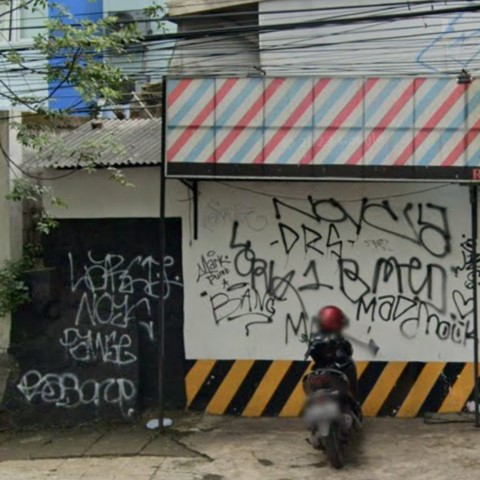

### Contoh Bukan Vandalisme:
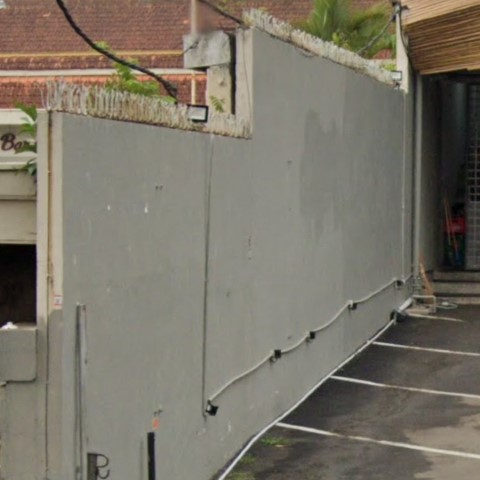

### Pengertian Vandalisme dan Bedanya Dengan Graffiti dan Mural
Dikutip dari [https://www.kompasiana.com/irraisa.lisseptiyana/54f74bcda33311af2c8b45a3/vandalisme-graffiti-dan-mural-sama-gak-sih](https://www.kompasiana.com/irraisa.lisseptiyana/54f74bcda33311af2c8b45a3/vandalisme-graffiti-dan-mural-sama-gak-sih), vandalisme adalah sebuah aksi dimana aksi tersebut bersifat merusak dan menghancurkan hasil karya orang lain dan barang berharga secara kasar dan ganas serta mengganggu mata. Sedangkan graffiti adalah coretan di dinding dengan mempertimbangkan komposisi warna, garis, bentuk dan volume untuk menuliskan kata, simbol atau kalimat tertentu. Alat yang digunakan untuk Graffiti biasanya adalah cat semprot (pilox) atau spidol. Kemudian mural sendiri berasal dari bahasa latin Murus yang berarti Dinding. Arti yang lebih luas lagi, Mural adalah lukisan yang dilukis pada bidang permanen seperti tembok, dinding dan sejenisnya.

Pada dasarnya graffiti dan mural juga bisa dianggap sebagai vandalisme apabila dilakukan tanpa izin, pada kasus ini kami memiliki asumsi awal bahwa segala bentuk graffiti dan mural bukanlah termasuk ke dalam vandalisme, sehingga pada dataset kami mengelompokkan graffiti dan mural ke kelas not_vandalized.



# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Error, skip this

In [ ]:
# # # download dataset
# import pathlib
# dataset_url = "https://drive.google.com/uc?export=download&id=1IGWtjuXY7wjZ2_19VYMBPDeArPUfltXI"
# data_dir = tf.keras.utils.get_file('vandalized_photos.zip', origin=dataset_url, extract=True)
# data_dir = pathlib.Path(data_dir).with_suffix('')

In [ ]:
# # jumlah instance dataset
# image_count = len(list(data_dir.glob('*/*.jpg')))
# print(image_count)

In [ ]:
# import os
# list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
# print("Jumlah class: {} ".format(len(list_dir)))
# print("Jumlah instance per class")
# for x in list_dir:
#  print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpg'.format(x))))))

## Create a dataset

In [ ]:
batch_size = 32
img_height = 480
img_width = 480

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
 "/content/drive/MyDrive/vandalized_photos",
 validation_split=0.2,
 subset="training",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 301 files belonging to 2 classes.
Using 241 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
 "/content/drive/MyDrive/vandalized_photos",
 validation_split=0.2,
 subset="validation",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 301 files belonging to 2 classes.
Using 60 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['not_vandalized', 'vandalized']


## Visualize the data

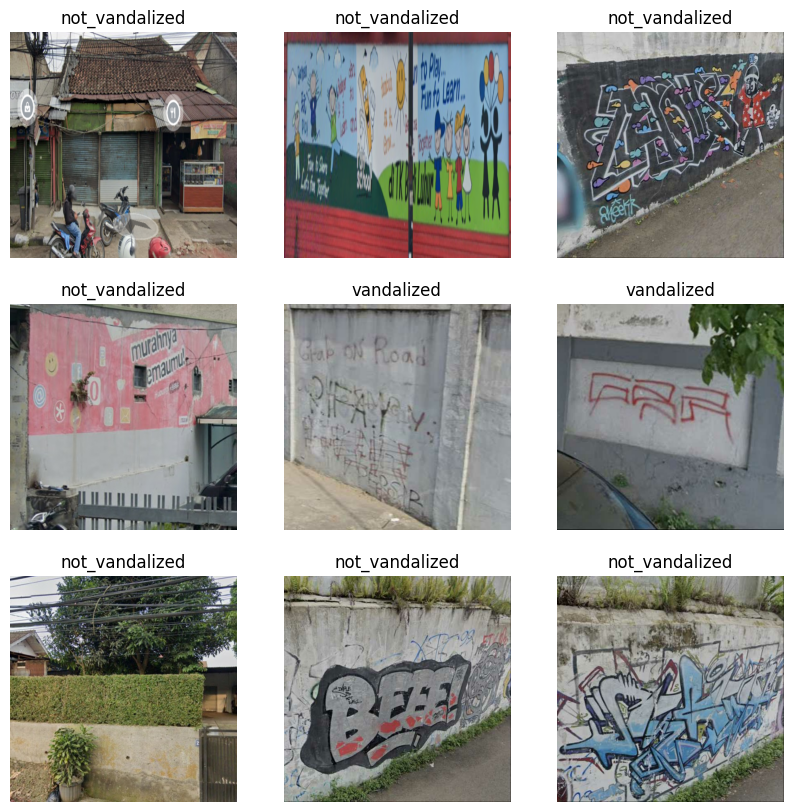

In [ ]:
# lihat dataset training
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
   ax = plt.subplot(3, 3, i + 1) # 3 baris, 3 kolom
   plt.imshow(images[i].numpy().astype("uint8"))
   plt.title(class_names[labels[i]])
   plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
 print(image_batch.shape)
 print(labels_batch.shape)
 break


(32, 480, 480, 3)
(32,)


## Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Create model 1

### Create the model

In [ ]:
num_classes = len(class_names)


model = Sequential([
 layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])


### Compile the model

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 480, 480, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 480, 480, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 240, 240, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 120, 120, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 64)      1

### Train the model

In [ ]:
epochs=10
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)


Epoch 1/10
8/8 [==============================] - 21s 1s/step - loss: 5.8218 - accuracy: 0.5270 - val_loss: 0.7384 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 1s 120ms/step - loss: 0.6975 - accuracy: 0.5436 - val_loss: 0.6801 - val_accuracy: 0.5500
Epoch 3/10
8/8 [==============================] - 1s 121ms/step - loss: 0.6665 - accuracy: 0.6639 - val_loss: 0.6609 - val_accuracy: 0.6167
Epoch 4/10
8/8 [==============================] - 1s 122ms/step - loss: 0.6039 - accuracy: 0.6763 - val_loss: 0.6720 - val_accuracy: 0.5000
Epoch 5/10
8/8 [==============================] - 1s 121ms/step - loss: 0.5374 - accuracy: 0.7178 - val_loss: 0.8080 - val_accuracy: 0.5333
Epoch 6/10
8/8 [==============================] - 1s 121ms/step - loss: 0.4054 - accuracy: 0.8548 - val_loss: 0.6515 - val_accuracy: 0.6000
Epoch 7/10
8/8 [==============================] - 1s 135ms/step - loss: 0.3457 - accuracy: 0.8755 - val_loss: 0.9681 - val_accuracy: 0.5333
Epoch 8/10
8/8 [======

## Visualize training 1 results

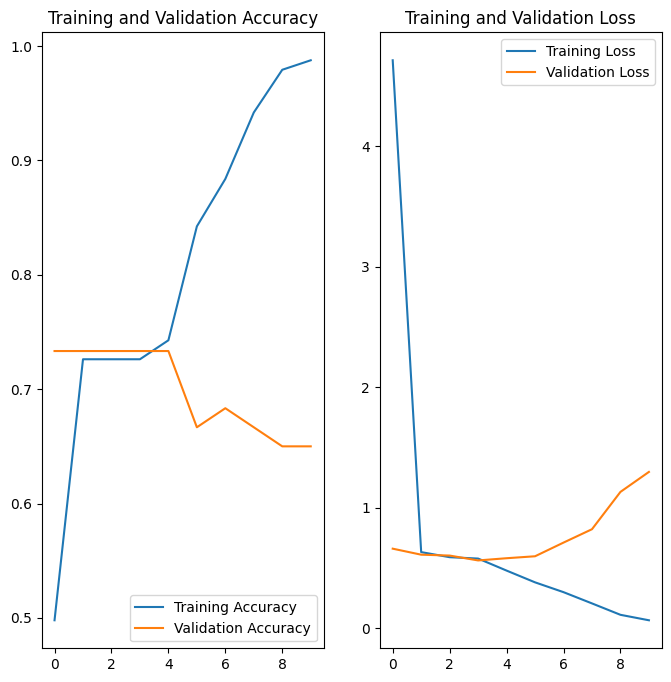

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
 [
   layers.RandomFlip("horizontal",
                     input_shape=(img_height,
                                 img_width,
                                 3)),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.1),
 ]
)


Visualize a few augmented examples by applying data augmentation to the same image several times:

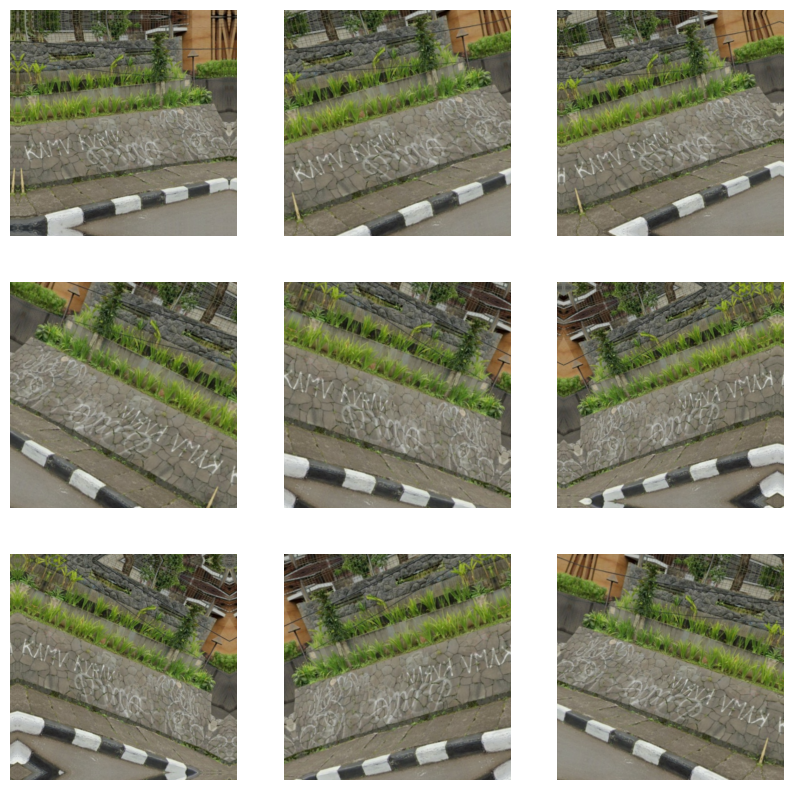

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
 for i in range(9):
   augmented_images = data_augmentation(images)
   ax = plt.subplot(3, 3, i + 1)
   plt.imshow(augmented_images[0].numpy().astype("uint8"))
   plt.axis("off")

## Create model 2

Add Dropout

In [ ]:
model = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


Compile and train the model 2

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 5s 223ms/step - loss: 1.7880 - accuracy: 0.4979 - val_loss: 0.6877 - val_accuracy: 0.6000
Epoch 2/15
8/8 [==============================] - 2s 208ms/step - loss: 0.6979 - accuracy: 0.5602 - val_loss: 0.6872 - val_accuracy: 0.5667
Epoch 3/15
8/8 [==============================] - 2s 207ms/step - loss: 0.6943 - accuracy: 0.4481 - val_loss: 0.6899 - val_accuracy: 0.5333
Epoch 4/15
8/8 [==============================] - 2s 207ms/step - loss: 0.6835 - accuracy: 0.5975 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 2s 209ms/step - loss: 0.6802 - accuracy: 0.5809 - val_loss: 0.6903 - val_accuracy: 0.5333
Epoch 6/15
8/8 [==============================] - 2s 197ms/step - loss: 0.6814 - accuracy: 0.5934 - val_loss: 0.6834 - val_accuracy: 0.6500
Epoch 7/15
8/8 [==============================] - 2s 196ms/step - loss: 0.6700 - accuracy: 0.6017 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 8/15
8/8 [====

## Visualize training 2 results

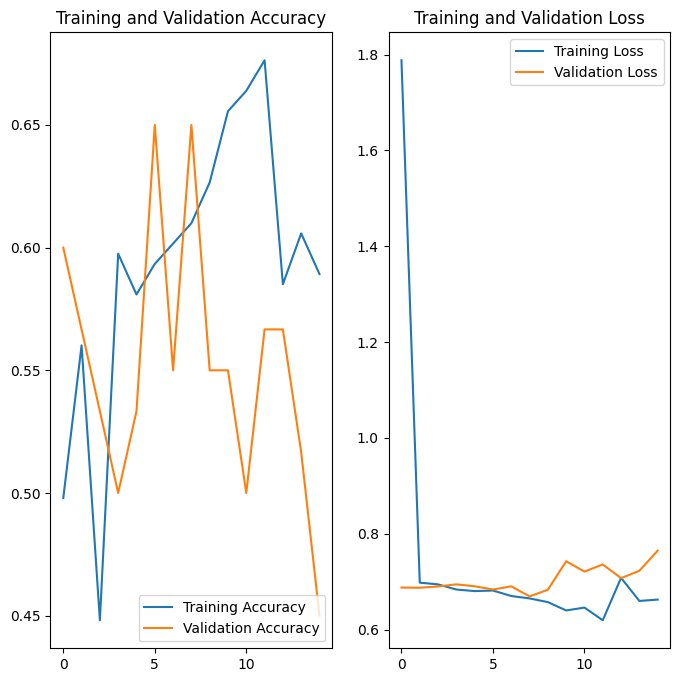

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Akurasi pada data validasi cenderrung rendah (50-60 %), hal ini mungkin disebabkan karena kami mengelompokkan graffiti dan mural ke kelas not_vandalized, sehingga model cenderung sulit untuk mengklasifikasikan gambar yang tepat (ambigu).

## Mengelompokkan Ulang Dataset

Kami memindahkan 51 gambar dari direktori not_vandalized yang berupa graffiti dan mural yang dirasa mencerminkan vandalisme ke direktori vandalized.


> vandalized: 219 gambar

> not_vandalized: 82 gambar





In [ ]:
train_ds2 = tf.keras.utils.image_dataset_from_directory(
 "/content/drive/MyDrive/vandalized_photos - Copy",
 validation_split=0.2,
 subset="training",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 301 files belonging to 2 classes.
Using 241 files for training.


In [ ]:
val_ds2 = tf.keras.utils.image_dataset_from_directory(
 "/content/drive/MyDrive/vandalized_photos - Copy",
 validation_split=0.2,
 subset="validation",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

Found 301 files belonging to 2 classes.
Using 60 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds2.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Create model 3

In [ ]:
model3 = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


In [ ]:
model3.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model3.fit(
 train_ds2,
 validation_data=val_ds2,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 9s 989ms/step - loss: 2.0667 - accuracy: 0.5228 - val_loss: 0.6032 - val_accuracy: 0.7333
Epoch 2/15
8/8 [==============================] - 2s 208ms/step - loss: 0.6089 - accuracy: 0.7261 - val_loss: 0.5859 - val_accuracy: 0.7333
Epoch 3/15
8/8 [==============================] - 2s 198ms/step - loss: 0.6014 - accuracy: 0.7261 - val_loss: 0.5633 - val_accuracy: 0.7333
Epoch 4/15
8/8 [==============================] - 2s 195ms/step - loss: 0.5915 - accuracy: 0.7344 - val_loss: 0.5446 - val_accuracy: 0.7333
Epoch 5/15
8/8 [==============================] - 2s 195ms/step - loss: 0.5947 - accuracy: 0.7220 - val_loss: 0.5910 - val_accuracy: 0.8000
Epoch 6/15
8/8 [==============================] - 2s 195ms/step - loss: 0.5921 - accuracy: 0.7344 - val_loss: 0.5348 - val_accuracy: 0.7500
Epoch 7/15
8/8 [==============================] - 2s 194ms/step - loss: 0.5757 - accuracy: 0.7427 - val_loss: 0.5386 - val_accuracy: 0.7667
Epoch 8/15
8/8 [====

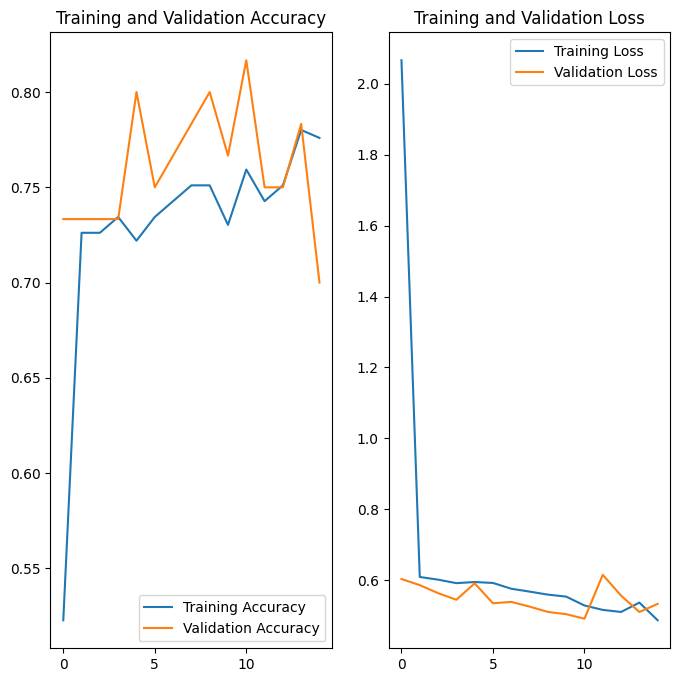

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Akurasi pada data validasi meningkat menjadi (70-80 %), tetapi perlu diingkat bahwa dataset yang sekarang menjadi tidak seimbang (imbalance).

## Create model 4

Mengurangi Conv2D layer menjadi 2, mengurangi Dense menjadi 64

In [ ]:
model4 = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


In [ ]:
model4.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model4.fit(
 train_ds2,
 validation_data=val_ds2,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 3s 206ms/step - loss: 11.7931 - accuracy: 0.4855 - val_loss: 2.0845 - val_accuracy: 0.7333
Epoch 2/15
8/8 [==============================] - 1s 176ms/step - loss: 2.7086 - accuracy: 0.7261 - val_loss: 0.8427 - val_accuracy: 0.7333
Epoch 3/15
8/8 [==============================] - 1s 171ms/step - loss: 0.8820 - accuracy: 0.3942 - val_loss: 0.6240 - val_accuracy: 0.7333
Epoch 4/15
8/8 [==============================] - 1s 172ms/step - loss: 0.6207 - accuracy: 0.7261 - val_loss: 0.5625 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 1s 171ms/step - loss: 0.6715 - accuracy: 0.6598 - val_loss: 0.5511 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 1s 184ms/step - loss: 0.6310 - accuracy: 0.7510 - val_loss: 0.6199 - val_accuracy: 0.7500
Epoch 7/15
8/8 [==============================] - 1s 184ms/step - loss: 0.6184 - accuracy: 0.7261 - val_loss: 0.5274 - val_accuracy: 0.7667
Epoch 8/15
8/8 [===

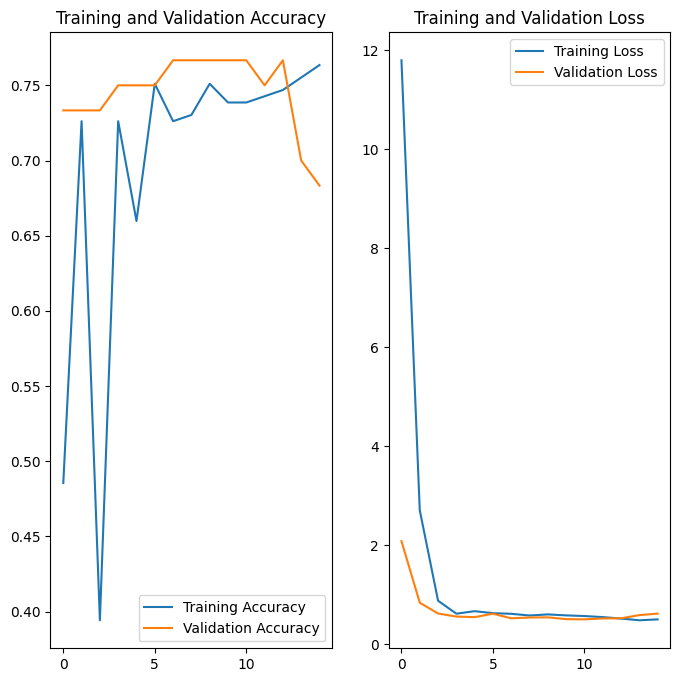

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Terjadi loss yang tinggi dan ketidakstabilan pada akurasi data training di epoch awal-awal.

## Create model 5

Menambah Conv2D layer menjadi 4



In [ ]:
model5 = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.2),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


In [ ]:
model5.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model5.fit(
 train_ds2,
 validation_data=val_ds2,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 4s 262ms/step - loss: 1.1963 - accuracy: 0.6515 - val_loss: 0.5735 - val_accuracy: 0.7333
Epoch 2/15
8/8 [==============================] - 2s 219ms/step - loss: 0.6083 - accuracy: 0.7261 - val_loss: 0.5603 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 2s 217ms/step - loss: 0.5863 - accuracy: 0.7261 - val_loss: 0.5910 - val_accuracy: 0.7500
Epoch 4/15
8/8 [==============================] - 2s 218ms/step - loss: 0.5874 - accuracy: 0.7427 - val_loss: 0.5451 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 2s 229ms/step - loss: 0.5880 - accuracy: 0.7303 - val_loss: 0.5373 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 2s 247ms/step - loss: 0.5568 - accuracy: 0.7303 - val_loss: 0.5552 - val_accuracy: 0.7333
Epoch 7/15
8/8 [==============================] - 2s 224ms/step - loss: 0.5568 - accuracy: 0.7137 - val_loss: 0.6025 - val_accuracy: 0.6500
Epoch 8/15
8/8 [====

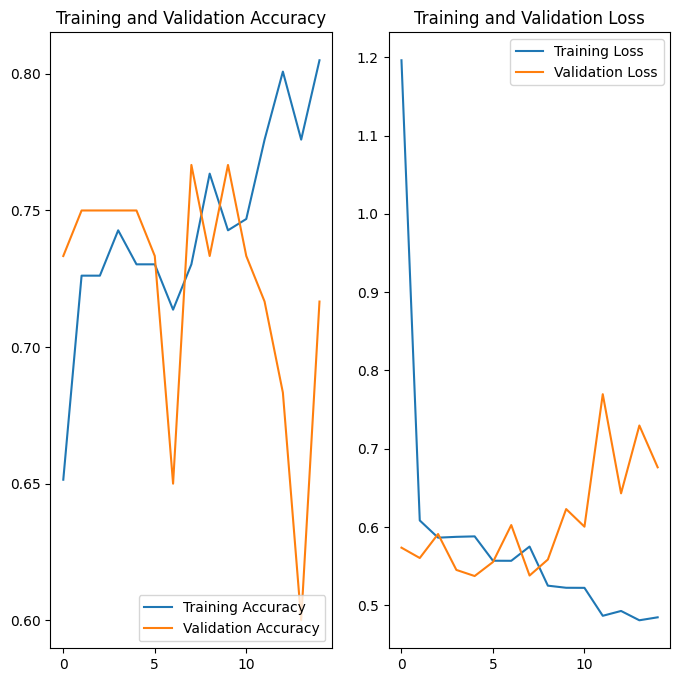

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Akurasi dan loss pada data validasi cenderung tidak stabil.

## Create model 6

Menambah Conv2D layer menjadi 4, Menambah Dense menjadi 256, Menambah Dropout menjadi 0.3



In [ ]:
model6 = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.3),
 layers.Flatten(),
 layers.Dense(256, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


In [ ]:
model6.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model6.fit(
 train_ds2,
 validation_data=val_ds2,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 4s 244ms/step - loss: 1.9913 - accuracy: 0.5768 - val_loss: 0.5606 - val_accuracy: 0.7333
Epoch 2/15
8/8 [==============================] - 2s 219ms/step - loss: 0.5921 - accuracy: 0.7261 - val_loss: 0.5706 - val_accuracy: 0.7333
Epoch 3/15
8/8 [==============================] - 2s 219ms/step - loss: 0.5922 - accuracy: 0.7261 - val_loss: 0.5797 - val_accuracy: 0.7333
Epoch 4/15
8/8 [==============================] - 2s 223ms/step - loss: 0.5979 - accuracy: 0.7261 - val_loss: 0.5643 - val_accuracy: 0.7333
Epoch 5/15
8/8 [==============================] - 2s 225ms/step - loss: 0.6072 - accuracy: 0.7261 - val_loss: 0.5821 - val_accuracy: 0.7333
Epoch 6/15
8/8 [==============================] - 2s 223ms/step - loss: 0.5813 - accuracy: 0.7261 - val_loss: 0.5631 - val_accuracy: 0.7333
Epoch 7/15
8/8 [==============================] - 2s 220ms/step - loss: 0.5887 - accuracy: 0.7261 - val_loss: 0.5777 - val_accuracy: 0.7333
Epoch 8/15
8/8 [====

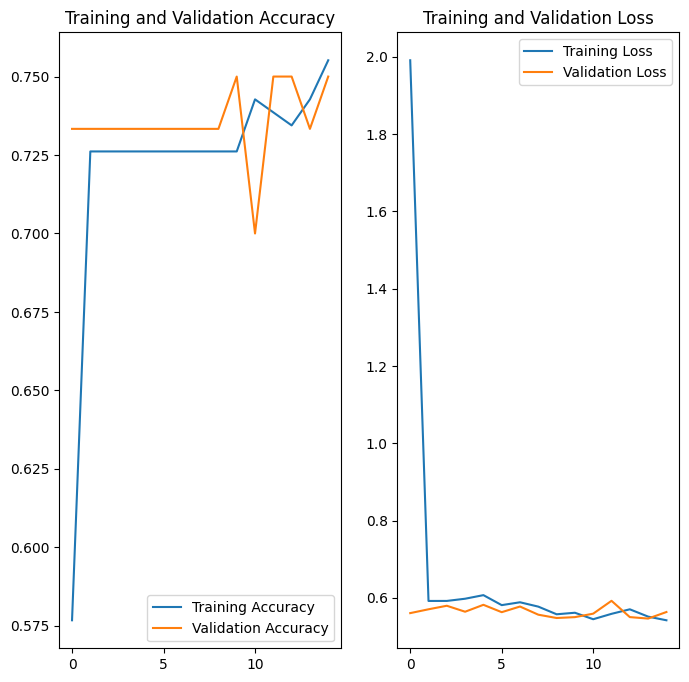

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Akurasi dan loss pada data training dan validasi cenderung stabil daripada model-model sebelumnya.

## Create model 7

Menambah Conv2D layer menjadi 5, Menambah Dense menjadi 256, Menambah Dropout menjadi 0.3



In [ ]:
model7 = Sequential([
 data_augmentation,
 layers.Rescaling(1./255),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(128, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(192, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Dropout(0.3),
 layers.Flatten(),
 layers.Dense(256, activation='relu'),
 layers.Dense(num_classes, name="outputs")
])


In [ ]:
model7.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
epochs = 15
history = model7.fit(
 train_ds2,
 validation_data=val_ds2,
 epochs=epochs
)


Epoch 1/15
8/8 [==============================] - 6s 301ms/step - loss: 0.8471 - accuracy: 0.5685 - val_loss: 0.5659 - val_accuracy: 0.7333
Epoch 2/15
8/8 [==============================] - 2s 225ms/step - loss: 0.5983 - accuracy: 0.7261 - val_loss: 0.5927 - val_accuracy: 0.7333
Epoch 3/15
8/8 [==============================] - 2s 224ms/step - loss: 0.5915 - accuracy: 0.7261 - val_loss: 0.5658 - val_accuracy: 0.7333
Epoch 4/15
8/8 [==============================] - 2s 222ms/step - loss: 0.5879 - accuracy: 0.7261 - val_loss: 0.5726 - val_accuracy: 0.7333
Epoch 5/15
8/8 [==============================] - 2s 231ms/step - loss: 0.5910 - accuracy: 0.7261 - val_loss: 0.5642 - val_accuracy: 0.7333
Epoch 6/15
8/8 [==============================] - 2s 250ms/step - loss: 0.5964 - accuracy: 0.7261 - val_loss: 0.5648 - val_accuracy: 0.7333
Epoch 7/15
8/8 [==============================] - 2s 226ms/step - loss: 0.5876 - accuracy: 0.7261 - val_loss: 0.5687 - val_accuracy: 0.7333
Epoch 8/15
8/8 [====

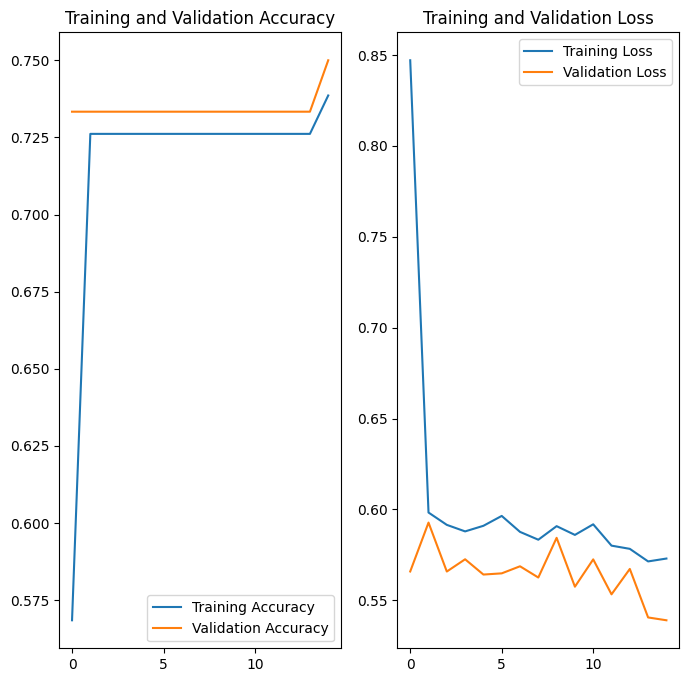

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Akurasi  pada data training dan validasi sangat stabil daripada model-model sebelumnya.

## Predict on new data

In [ ]:
def predict_and_print(models, img, class_names):
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Model pertama
    predictions = models[0].predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "\nModel Kedua\n"
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

    # Loop melalui model ke-3 hingga ke-7
    for i, model in enumerate(models[1:], start=3):
        predictions = model.predict(img_array)
        score = tf.nn.softmax(predictions[0])

        print(
            "\nModel Ke-{}\n"
            "This image most likely belongs to {} with a {:.2f} percent confidence."
            .format(i, class_names[np.argmax(score)], 100 * np.max(score))
        )


In [ ]:
models_to_use = [model, model3, model4, model5, model6, model7]

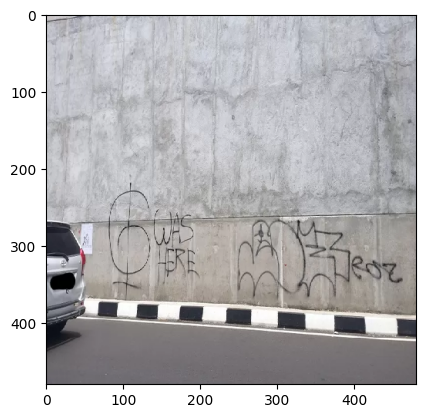

In [ ]:
image_baru_url = "https://static.promediateknologi.id/crop/0x0:0x0/750x500/webp/photo/2021/08/23/3021066905.jpg"
image_baru_path = tf.keras.utils.get_file('3', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
predict_and_print(models_to_use, img, class_names)

1/1 [==============================] - 0s 29ms/step

Model Kedua
This image most likely belongs to vandalized with a 74.99 percent confidence.
1/1 [==============================] - 0s 26ms/step

Model Ke-3
This image most likely belongs to not_vandalized with a 55.73 percent confidence.
1/1 [==============================] - 0s 28ms/step

Model Ke-4
This image most likely belongs to vandalized with a 71.94 percent confidence.
1/1 [==============================] - 0s 30ms/step

Model Ke-5
This image most likely belongs to vandalized with a 63.80 percent confidence.
1/1 [==============================] - 0s 29ms/step

Model Ke-6
This image most likely belongs to vandalized with a 68.79 percent confidence.
1/1 [==============================] - 0s 25ms/step

Model Ke-7
This image most likely belongs to vandalized with a 74.99 percent confidence.


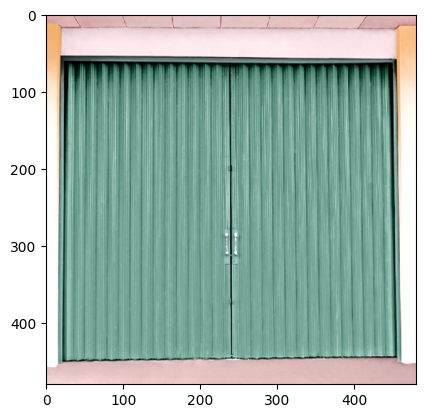

In [ ]:
image_baru_url = "https://superteknik.com/wp-content/uploads/2017/05/folding-gate_3_221154.jpg"
image_baru_path = tf.keras.utils.get_file('5', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
predict_and_print(models_to_use, img, class_names)

1/1 [==============================] - 0s 21ms/step

Model Kedua
This image most likely belongs to vandalized with a 70.82 percent confidence.
1/1 [==============================] - 0s 20ms/step

Model Ke-3
This image most likely belongs to not_vandalized with a 71.87 percent confidence.
1/1 [==============================] - 0s 19ms/step

Model Ke-4
This image most likely belongs to not_vandalized with a 66.72 percent confidence.
1/1 [==============================] - 0s 20ms/step

Model Ke-5
This image most likely belongs to not_vandalized with a 69.89 percent confidence.
1/1 [==============================] - 0s 23ms/step

Model Ke-6
This image most likely belongs to vandalized with a 50.35 percent confidence.
1/1 [==============================] - 0s 23ms/step

Model Ke-7
This image most likely belongs to vandalized with a 70.82 percent confidence.


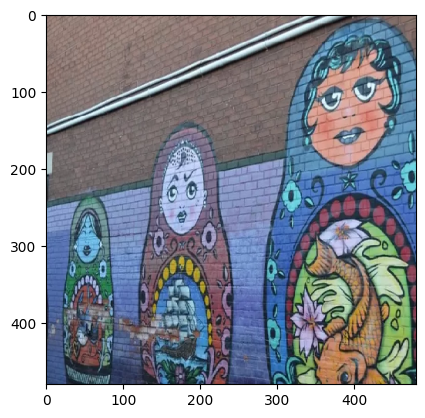

In [ ]:
image_baru_url = "https://static.promediateknologi.id/crop/0x0:0x0/750x500/webp/photo/2021/10/03/4149552663.jpg"
image_baru_path = tf.keras.utils.get_file('6', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
predict_and_print(models_to_use, img, class_names)

1/1 [==============================] - 0s 31ms/step

Model Kedua
This image most likely belongs to vandalized with a 74.99 percent confidence.
1/1 [==============================] - 0s 28ms/step

Model Ke-3
This image most likely belongs to not_vandalized with a 55.73 percent confidence.
1/1 [==============================] - 0s 26ms/step

Model Ke-4
This image most likely belongs to vandalized with a 71.94 percent confidence.
1/1 [==============================] - 0s 31ms/step

Model Ke-5
This image most likely belongs to vandalized with a 63.80 percent confidence.
1/1 [==============================] - 0s 27ms/step

Model Ke-6
This image most likely belongs to vandalized with a 68.79 percent confidence.
1/1 [==============================] - 0s 28ms/step

Model Ke-7
This image most likely belongs to vandalized with a 74.99 percent confidence.


78906/78906 [==============================] - 0s 2us/step


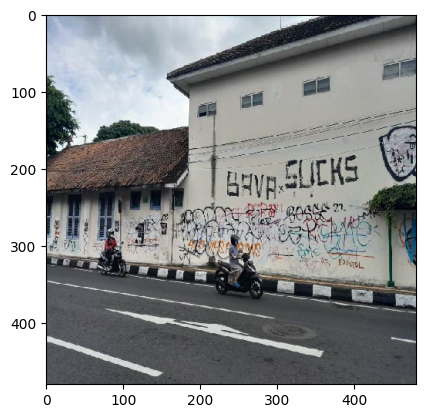

In [ ]:
image_baru_url = "https://www.wartakita.org/wp-content/uploads/2022/10/jalan-perempatan-jetis-jogja-terkena-aksi-vandalisme.jpg"
image_baru_path = tf.keras.utils.get_file('7', origin=image_baru_url)
img = tf.keras.utils.load_img(
   image_baru_path, target_size=(img_height, img_width)
)
plt.imshow(img)

In [ ]:
predict_and_print(models_to_use, img, class_names)

1/1 [==============================] - 0s 21ms/step

Model Kedua
This image most likely belongs to vandalized with a 89.57 percent confidence.
1/1 [==============================] - 0s 20ms/step

Model Ke-3
This image most likely belongs to vandalized with a 93.51 percent confidence.
1/1 [==============================] - 0s 20ms/step

Model Ke-4
This image most likely belongs to vandalized with a 96.14 percent confidence.
1/1 [==============================] - 0s 21ms/step

Model Ke-5
This image most likely belongs to vandalized with a 99.70 percent confidence.
1/1 [==============================] - 0s 19ms/step

Model Ke-6
This image most likely belongs to vandalized with a 97.54 percent confidence.
1/1 [==============================] - 0s 21ms/step

Model Ke-7
This image most likely belongs to vandalized with a 89.57 percent confidence.


## Kesimpulan

Model 3 merupakan model yang dapat mengklasifikasikan 4 data gambar baru dengan tepat. Model 3 memiliki akurasi pada data validasi sekitar (70-80 %). Model 3 menggunakan dataset yang sudah diatur ulang, menyebabkan dataset yang imbalance sehingga akurasinya cenderung meningkat jauh dibandingkan model 2 (yang menggunakan dataset awal). Dataset yang saat ini ulang perlu dilakukan rebalancing dengan cara menambah data baru ke kelas yang lebih sedikit. Perlu dilakukan utak-atik arsitektur model, dan praproses lebih lanjut untuk meningkatkan lagi kinerja modelnya.